<a href="https://colab.research.google.com/github/Loopercool/Data-Detectives/blob/main/Diti_202311010_ee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

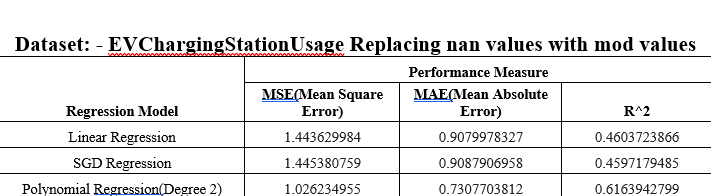

In [ ]:
#In this file I(Diti Soni) worked on dataset in which i replaced null values with Mode of thier resp column
#Firstly I droped columns according to my domain knowledge and some by experimenting
#Then resplayed some data visualizations
#For preprocessing Firstly I convert START and END time to numeric value according to thier time zone given
#Outlier were removed
#Then label encoding was done to convert categorical values to numeric
#Then regression was applied and result is as follow:
from IPython.display import Image
image_path = '/content/drive/MyDrive/Screenshot 2023-09-17 224048.png'
Image(filename=image_path)

# **Import**

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv")

<ipython-input-3-041004de04d7>:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv")


In [ ]:
df_main.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
df_box = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv')

In [ ]:
df_box.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number', 'Total_time_hours',
       'Charging_time_hours'],
      dtype='object')

<Axes: xlabel='Energy (kWh)', ylabel='Charging_time_hours'>

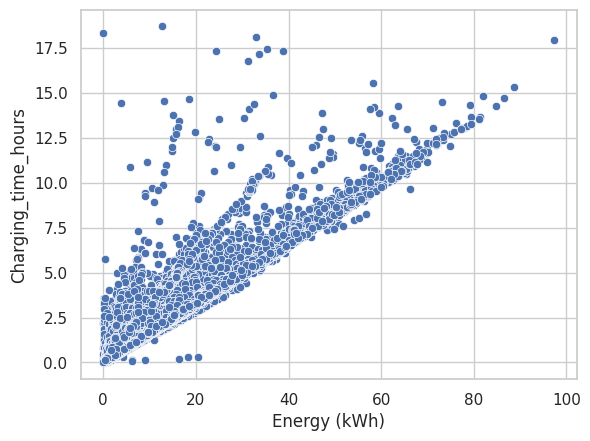

In [ ]:
sns.scatterplot(x = df_box['Energy (kWh)'], y = df_box['Charging_time_hours'])

<Axes: xlabel='Total_time_hours', ylabel='Charging_time_hours'>

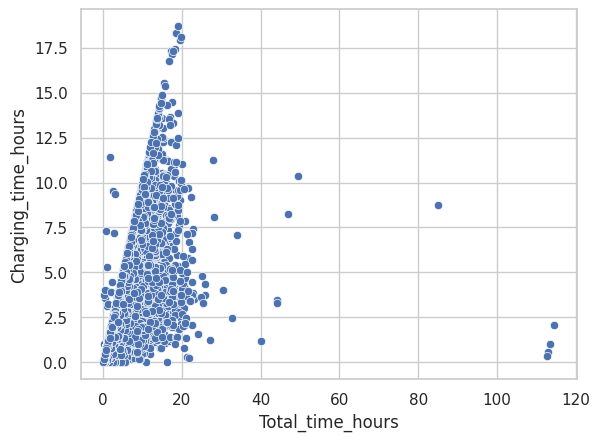

In [ ]:
sns.scatterplot(x = df_box['Total_time_hours'], y = df_box['Charging_time_hours'])

<Axes: >

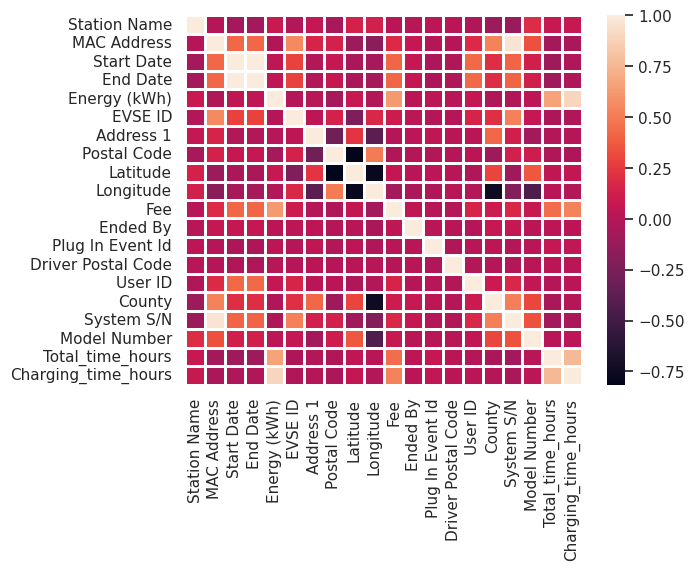

In [ ]:
sns.heatmap(data=df_box.corr(), lw = 1)

In [ ]:
columns_to_drop=['Currency','County','Org Name']
df_main.drop(columns=columns_to_drop, inplace=True)

# **Remove Entries having nan value**

In [ ]:
for column in df_main.columns:
    mode_value = df_main[column].mode().iloc[0]  # Calculate mode for the column
    df_main[column].fillna(mode_value, inplace=True)

In [ ]:
data_cleaned = df_main

In [ ]:
data_cleaned.isnull().sum()

Station Name                       0
MAC Address                        0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Country                            0
Latitude                           0
Longitude                          0
Fee                                0
Ended By                           0
Plug In Event Id                   0
Driver Postal Code                 0
U

In [ ]:
data_cleaned.shape

(259415, 30)

# **Converting *START DATE, Start time Zone* to numeric**

In [ ]:
selected_columns = ["Start Date", "Start Time Zone"]

# Create a new DataFrame with the selected columns
dfa = data_cleaned[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfa.iterrows():
    if row["Start Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["Start Date"])
    else:
        converted_dt = datetime.strptime(row["Start Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["Start Date"])
    numeric_values.append(numeric_value)

dfa["ConvertedDateTime"] = converted_date_times
dfa["NumericValue"] = numeric_values

print(dfa)

data_cleaned["Start Date"] = dfa["NumericValue"]

              Start Date Start Time Zone          ConvertedDateTime  \
0        7/29/2011 20:17             PDT        2011-07-29 20:17:00   
1         7/30/2011 0:00             PDT        2011-07-30 00:00:00   
2         7/30/2011 8:16             PDT        2011-07-30 08:16:00   
3        7/30/2011 14:51             PDT        2011-07-30 14:51:00   
4        7/30/2011 18:51             PDT        2011-07-30 18:51:00   
...                  ...             ...                        ...   
259410  12/31/2020 16:39             PST  2020-12-31 16:39:00-08:00   
259411  12/31/2020 16:48             PST  2020-12-31 16:48:00-08:00   
259412  12/31/2020 17:28             PST  2020-12-31 17:28:00-08:00   
259413  12/31/2020 17:49             PST  2020-12-31 17:49:00-08:00   
259414  12/31/2020 18:19             PST  2020-12-31 18:19:00-08:00   

        NumericValue  
0       1.311971e+09  
1       1.311984e+09  
2       1.312014e+09  
3       1.312037e+09  
4       1.312052e+09  
...      

<ipython-input-10-5fe1e3c85d9c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["ConvertedDateTime"] = converted_date_times
<ipython-input-10-5fe1e3c85d9c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["NumericValue"] = numeric_values


In [ ]:
print("Original dataset:")
print(data_cleaned)

# Function to check if a value is a valid date and time format
def is_valid_datetime(value):
    try:
        datetime.strptime(value, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

# Filter out rows with invalid date and time values
data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]

# Print the dataset after dropping invalid rows
# print("\nDataset after dropping invalid rows:")
# print(df_main)

Original dataset:
                          Station Name          MAC Address    Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311971e+09   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311984e+09   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312014e+09   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312037e+09   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312052e+09   
...                                ...                  ...           ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

       Start Time Zone          End Date End Time Zone  \

In [ ]:
selected_columns = ['End Date', 'End Time Zone']

# Create a new DataFrame with the selected columns
dfb = data_cleaned[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfb.iterrows():
    if row["End Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["End Date"])
    else:
        converted_dt = datetime.strptime(row["End Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["End Date"])
    numeric_values.append(numeric_value)

dfb["ConvertedDateTime"] = converted_date_times
dfb["NumericValue"] = numeric_values

print(dfb)

data_cleaned["End Date"] = dfa["NumericValue"]

                End Date End Time Zone          ConvertedDateTime  \
0        7/29/2011 23:20           PDT        2011-07-29 23:20:00   
1         7/30/2011 0:02           PDT        2011-07-30 00:02:00   
2        7/30/2011 12:34           PDT        2011-07-30 12:34:00   
3        7/30/2011 16:55           PDT        2011-07-30 16:55:00   
4        7/30/2011 20:03           PDT        2011-07-30 20:03:00   
...                  ...           ...                        ...   
259410  12/31/2020 17:14           PST  2020-12-31 17:14:00-08:00   
259411  12/31/2020 20:31           PST  2020-12-31 20:31:00-08:00   
259412    1/1/2021 10:56           PST  2021-01-01 10:56:00-08:00   
259413  12/31/2020 21:55           PST  2020-12-31 21:55:00-08:00   
259414  12/31/2020 19:01           PST  2020-12-31 19:01:00-08:00   

        NumericValue  
0       1.311982e+09  
1       1.311984e+09  
2       1.312029e+09  
3       1.312045e+09  
4       1.312056e+09  
...              ...  
259410  1.

<ipython-input-13-89e9d7c67890>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["ConvertedDateTime"] = converted_date_times
<ipython-input-13-89e9d7c67890>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["NumericValue"] = numeric_values
<ipython-input-13-89e9d7c67890>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'City',
       'State/Province', 'Postal Code', 'Country', 'Latitude', 'Longitude',
       'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
columns_to_drop=['Start Time Zone','End Time Zone','Transaction Date (Pacific Time)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

<ipython-input-15-73ab62866251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


In [ ]:
def time_to_numeric(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)

data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)

<ipython-input-16-26a9c2ee930d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)
<ipython-input-16-26a9c2ee930d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)


In [ ]:
columns_to_drop=['Total Duration (hh:mm:ss)','Charging Time (hh:mm:ss)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

<ipython-input-17-bbadedf6f900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'City',
       'State/Province', 'Postal Code', 'Country', 'Latitude', 'Longitude',
       'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'System S/N', 'Model Number', 'Total_time_hours',
       'Charging_time_hours'],
      dtype='object')

In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,...,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,System S/N,Model Number,Total_time_hours,Charging_time_hours
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311971e+09,1.311971e+09,6.249457,2.625,0.784,Level 2,2,J1772,...,-122.160309,0.0,Plug Out at Vehicle,3,95124.0,3284.0,1.427410e+11,CT4020-HD-GW,3.058889,1.900833
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311984e+09,1.311984e+09,0.106588,0.045,0.013,Level 2,2,J1772,...,-122.160309,0.0,Customer,4,94301.0,4169.0,1.427410e+11,CT4020-HD-GW,0.035000,0.031667
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312014e+09,1.312014e+09,14.951777,6.280,1.876,Level 2,2,J1772,...,-122.160309,0.0,Plug Out at Vehicle,5,94301.0,4169.0,1.427410e+11,CT4020-HD-GW,4.292222,4.291111
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312037e+09,1.312037e+09,7.159643,3.007,0.899,Level 2,2,J1772,...,-122.160309,0.0,Customer,6,94302.0,2545.0,1.427410e+11,CT4020-HD-GW,2.056667,2.049444
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312052e+09,1.312052e+09,1.957765,0.822,0.246,Level 2,2,J1772,...,-122.160309,0.0,Plug Out at Vehicle,7,94043.0,3765.0,1.427410e+11,CT4020-HD-GW,1.190000,0.731667


# **Label Encode categorical columns**

In [ ]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Station Name', 'MAC Address', 'Port Type', 'Plug Type', 'Address 1',
       'City', 'State/Province', 'Country', 'Ended By', 'User ID',
       'Model Number'],
      dtype='object')


In [ ]:
categorical_columns = [col for col in categorical_columns if col != 'User ID']

In [ ]:
print(categorical_columns)

['Station Name', 'MAC Address', 'Port Type', 'Plug Type', 'Address 1', 'City', 'State/Province', 'Country', 'Ended By', 'Model Number']


In [ ]:
categorical_columns_1  = ['County', 'Model Number']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
  le = LabelEncoder()
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
  label_encoders[column] = le

print(data_cleaned)

<ipython-input-23-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-23-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-23-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

        Station Name  MAC Address    Start Date      End Date  Energy (kWh)  \
0                 12           25  1.311971e+09  1.311971e+09      6.249457   
1                 12           25  1.311984e+09  1.311984e+09      0.106588   
2                 12           25  1.312014e+09  1.312014e+09     14.951777   
3                 12           25  1.312037e+09  1.312037e+09      7.159643   
4                 12           25  1.312052e+09  1.312052e+09      1.957765   
...              ...          ...           ...           ...           ...   
259410            42           58  1.609433e+09  1.609433e+09      1.841000   
259411            44           44  1.609433e+09  1.609433e+09     12.744000   
259412            21           78  1.609436e+09  1.609436e+09     29.665000   
259413            44           44  1.609437e+09  1.609437e+09     11.976000   
259414            10           61  1.609439e+09  1.609439e+09      1.571000   

        GHG Savings (kg)  Gasoline Savings (gallons

In [ ]:
data_cleaned.drop(['City'],axis=1,inplace = True)
data_cleaned.drop(['State/Province'],axis=1,inplace=True)

<ipython-input-24-07a6f0543b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['City'],axis=1,inplace = True)
<ipython-input-24-07a6f0543b04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['State/Province'],axis=1,inplace=True)


In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,...,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,System S/N,Model Number,Total_time_hours,Charging_time_hours
78948,7,22,1.470029e+09,1.470029e+09,4.464626,1.875,0.560,1,1,0,...,-122.146065,0.0,8,1665,94587.0,523487,1.427410e+11,6,1.466111,1.423889
78949,8,24,1.470031e+09,1.470031e+09,7.501231,3.151,0.941,1,1,0,...,-122.146065,0.0,8,1771,95030.0,141845,1.428410e+11,6,4.940833,2.517778
78950,7,22,1.470031e+09,1.470031e+09,10.891753,4.575,1.367,1,2,0,...,-122.146065,0.0,8,1666,80525.0,203603,1.427410e+11,6,3.204722,3.188333
78951,13,23,1.470032e+09,1.470032e+09,6.968250,2.927,0.875,1,1,0,...,-122.159904,0.0,8,2093,94539.0,126575,1.427410e+11,6,2.740278,2.430278
78952,14,17,1.470032e+09,1.470032e+09,17.938757,7.534,2.251,1,1,0,...,-122.162849,0.0,8,3112,94024.0,191743,1.422410e+11,6,3.323333,3.320833


# **Save CSV to google drive**

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Total_time_hours', 'Charging_time_hours'],
      dtype='object')

In [ ]:
data_cleaned['Charging Efficiency'] = data_cleaned['Energy (kWh)'] / data_cleaned['Total_time_hours']

<ipython-input-26-945d5ea7d8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Charging Efficiency'] = data_cleaned['Energy (kWh)'] / data_cleaned['Total_time_hours']


In [ ]:
data_cleaned.drop(['Energy (kWh)', 'Total_time_hours'],axis=1,inplace=True)

<ipython-input-27-41e5a4b664f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['Energy (kWh)', 'Total_time_hours'],axis=1,inplace=True)


In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned_energy_efficiency_replace_mod.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned.csv')

# **Regression**

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv')

In [ ]:
data_cleaned.drop(['User ID'],axis=1,inplace=True)

<ipython-input-33-e95a44ce70f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['User ID'],axis=1,inplace=True)


In [ ]:
data_df = data_cleaned.drop(['Charging Efficiency'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Charging Efficiency'], random_state=42, test_size=0.20)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((207500, 22), (51875, 22))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor

# **Linear Regression**

In [ ]:
model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train_scaled, y_train)

predicted_values_linear_reg = model_linear_regression.predict(X_test_scaled)

print("Coefficients of liner regression:", model_linear_regression.coef_)
print("Intercept of liner regression:", model_linear_regression.intercept_)

linear_mse = mean_squared_error(y_test, predicted_values_linear_reg)
linear_mae = mean_absolute_error(y_test, predicted_values_linear_reg)
linear_r2 = r2_score(y_test, predicted_values_linear_reg)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression R-squared:", linear_r2)

Coefficients of liner regression: [-1.65948456e-02 -5.43992976e-02  1.43950175e-01  1.43950175e-01
 -4.13028277e+00  6.43410078e+00 -1.70021687e-02  1.02332642e-02
 -1.53348471e-02  7.63270570e-03  9.78459562e-03 -6.38771903e-02
  2.02171613e-13  2.48044277e-03  4.64168469e-02 -2.27895513e-01
 -5.73217691e-02 -1.19239278e-03 -1.17482535e-02  8.93141333e-02
 -1.24630563e-02 -1.87896952e+00]
Intercept of liner regression: 3.812554594016515
Linear Regression MSE: 1.4436299836732087
Linear Regression MAE: 0.9079978327413211
Linear Regression R-squared: 0.46037238663101576


## **Cross Fold Validation**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

size_scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled_cross = size_scaler.transform(X)

In [ ]:
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model, X_train_scaled_cross, y, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.2671929179323744
std_mse : 0.05295095767318773


# **SGDRegression**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

model_sgdregression.fit(X_train_scaled, y_train)

predicted_values_sgd_regression = model_sgdregression.predict(X_test_scaled)

print("Coefficients of sdg regression:", model_sgdregression.coef_)
print("Intercept of sdg regression:", model_sgdregression.intercept_)

sgd_mse = mean_squared_error(y_test, predicted_values_sgd_regression)
sgd_mae = mean_absolute_error(y_test, predicted_values_sgd_regression)
sgd_r2 = r2_score(y_test, predicted_values_sgd_regression)

print("SGD Regression MSE:", sgd_mse)
print("SGD Regression MAE:", sgd_mae)
print("SGD Regression R-squared:", sgd_r2)

Coefficients of sdg regression: [-1.37167429e-02 -6.15580619e-02  1.45756204e-01  1.45756204e-01
  1.15566603e+00  1.15574411e+00  5.46040332e-03  9.63942886e-03
 -7.18068468e-03  1.75726610e-02  1.81790846e-02 -6.09420000e-02
  0.00000000e+00 -4.24129194e-04  4.58401629e-02 -2.25520051e-01
 -6.22167753e-02  6.72207724e-03 -1.80333587e-02  9.32161483e-02
 -1.78203602e-02 -1.89724145e+00]
Intercept of sdg regression: [3.80927645]
SGD Regression MSE: 1.445380758655631
SGD Regression MAE: 0.9087906957567352
SGD Regression R-squared: 0.4597179484882814


## **Cross fold validation**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model_sgdregression, X_train_scaled_cross, y, cv=20, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

# **Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y_train)

# Predict using the trained model
predicted_values_poly = model.predict(X_test_poly)

poly_mse = mean_squared_error(y_test, predicted_values_poly)
poly_mae = mean_absolute_error(y_test, predicted_values_poly)
poly_r2 = r2_score(y_test, predicted_values_poly)

print("SGD Regression MSE:", poly_mse)
print("SGD Regression MAE:", poly_mae)
print("SGD Regression R-squared:", poly_r2)

SGD Regression MSE: 1.0262349547393097
SGD Regression MAE: 0.7307703812049828
SGD Regression R-squared: 0.6163942799437171
